In [1]:
import pandas as pd
import numpy as np
import os

In [156]:
os.chdir('/home/arklykov/HSE4/DataScience/regression_kaggle_competition/')

In [157]:
ID_COL = ['Id']
REAL_COL = ['LotFrontage', 'MasVnrArea']
INT_COL = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 
OBJ_COL = ['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
 'SaleType', 'SaleCondition', 'Street', 'Utilities', 'CentralAir']

OHE_COL = ['Street', 'CentralAir']

ORDER_COL_NAN = ['BsmtQual',
 'BsmtCond', 'GarageQual', 'GarageCond']
ORDER_COL = ['ExterQual','ExterCond', 'HeatingQC', 'KitchenQual']
ORDER_COL_AN = ['BsmtExposure']
ORDER_COL_BSMT = ['BsmtFinType1', 'BsmtFinType2']
ORDER_COL_CARAGE = ['GarageFinish']

CAT_COL = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional',
       'GarageType', 'PavedDrive', 'SaleType',
       'SaleCondition', 'Utilities']

TARGET_COL = ['SalePrice']

DROP_COL = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 
            'BedroomAbvGr', 'PoolArea', 'MiscVal'
]


In [163]:
train_data = pd.read_csv('data/raw/train.csv')

In [164]:
train_data = train_data.drop(ID_COL, axis=1)


In [167]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [165]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

<AxesSubplot: >

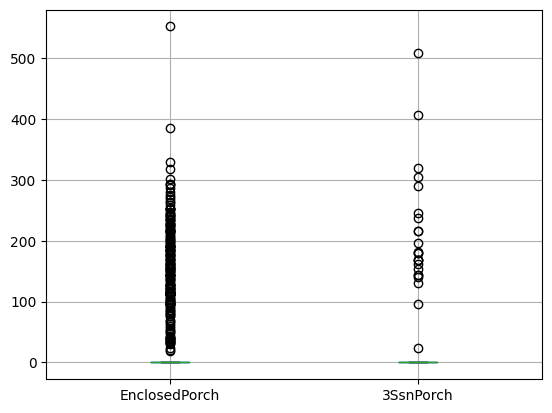

In [189]:
train_data.loc[:, 'EnclosedPorch':'3SsnPorch'].boxplot()

In [173]:
def drop_id(df: pd.DataFrame) -> pd.DataFrame:
    df = df.drop(ID_COL, axis=1)
    return df

In [919]:
def extract_target(df: pd.DataFrame):
    df, target = df.drop(TARGET_COL, axis=1), df[TARGET_COL]
    return df, target

In [920]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [921]:
def preprocess_real_col(df: pd.DataFrame) -> pd.DataFrame:
    df[REAL_COL[0]] = df[REAL_COL[0]].fillna(value=0.0)
    selected_rows = df[df[REAL_COL[1]].isnull()].index.to_list()
    df = df.drop(selected_rows, axis=0)
    df = df.drop(REAL_COL[2], axis=1)
    REAL_COL.remove(REAL_COL[2])
    df[REAL_COL] = df[REAL_COL].astype(np.float32)

    return df



In [922]:
def preprocess_int_col(df: pd.DataFrame) -> pd.DataFrame:
    df[INT_COL] = df[INT_COL].astype(np.int32)
    return df

In [923]:
def clear_col_list(lst: list, clear_lst:list) -> list:
    for i in clear_lst:
        lst.remove(i)
    return lst

In [924]:
def preprocess_obj_col(df: pd.DataFrame) -> pd.DataFrame:
    drop_column = df[OBJ_COL].loc[:, (df[OBJ_COL].isna().sum() > 200).values].columns.to_list()
    df = df.drop(drop_column, axis=1)

    return df

In [925]:
def preprocess_ohe_col(df: pd.DataFrame) -> pd.DataFrame:
    df[OHE_COL[0]] = df[OHE_COL[0]].replace(['Pave', 'Grvl'], [1, 0]).astype(np.int8)
    df[OHE_COL[1]] = df[OHE_COL[1]].replace(['Y', 'N'], [1, 0]).astype(np.int8)
    return df

In [926]:
from cmath import nan

def preprocess_order_nan_col(df: pd.DataFrame) -> pd.DataFrame:
    df[ORDER_COL_NAN] = df[ORDER_COL_NAN].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', nan], [5, 4, 3, 2, 1, 0]).astype(np.int8)
    return df
def preprocess_order_col(df: pd.DataFrame) -> pd.DataFrame:
    df[ORDER_COL] = df[ORDER_COL].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [5, 4, 3, 2, 1]).astype(np.int8)
    return df
def preprocess_order_an_col(df: pd.DataFrame) -> pd.DataFrame:
    df[ORDER_COL_AN] = df[ORDER_COL_AN].replace(['Gd', 'Av', 'Mn', 'No', nan], [4, 3, 2, 1, 0]).astype(np.int8)
    return df
def preprocess_order_bsmt_col(df: pd.DataFrame) -> pd.DataFrame:
    df[ORDER_COL_BSMT] = df[ORDER_COL_BSMT].replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', nan], [6, 5, 4, 3, 2, 1, 0]).astype(np.int8)
    return df
def preprocess_order_garage_col(df: pd.DataFrame) -> pd.DataFrame:
    df[ORDER_COL_CARAGE] = df[ORDER_COL_CARAGE].replace(['Fin', 'RFn', 'Unf', nan], [3, 2, 1, 0]).astype(np.int8)
    return df

In [927]:
def preprocess_cat_col(df: pd.DataFrame) -> pd.DataFrame:
    selected_rows = train_data[train_data['GarageType'].isnull()].index.to_list()
    df = df.drop(selected_rows, axis=0)
    selected_rows = train_data[train_data['Electrical'].isnull()].index.to_list()
    df = df.drop(selected_rows, axis=0)
    df[CAT_COL] = df[CAT_COL].astype('category')
    return df



In [928]:
train_data = drop_id(train_data)

In [929]:
train_data, target_data = extract_target(train_data)

In [930]:
train_data = preprocess_real_col(train_data)

In [931]:
train_data = preprocess_int_col(train_data)

In [932]:
train_data = preprocess_obj_col(train_data)

In [933]:
train_data = preprocess_ohe_col(train_data)

In [934]:
train_data = preprocess_order_nan_col(train_data)

In [935]:
train_data = preprocess_order_col(train_data)

In [936]:
train_data = preprocess_order_an_col(train_data)

In [937]:
train_data = preprocess_order_bsmt_col(train_data)

In [938]:
train_data = preprocess_order_garage_col(train_data)

In [939]:
train_data = preprocess_cat_col(train_data)

## Feature generation

In [194]:
train_interim_data = pd.read_pickle('data/interim/train.pkl')
target_interim_data = pd.read_pickle('data/interim/target.pkl')

In [195]:
train_interim_data.head()

,MSSubClass,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,1,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,548,3,3,Y,0,61,2,2008,WD,Normal
1,20,RL,80.0,1,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,460,3,3,Y,298,0,5,2007,WD,Normal
2,60,RL,68.0,1,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,608,3,3,Y,0,42,9,2008,WD,Normal
3,70,RL,60.0,1,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,642,3,3,Y,0,35,2,2006,WD,Abnorml
4,60,RL,84.0,1,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,836,3,3,Y,192,84,12,2008,WD,Normal


In [196]:
train_interim_data[['MSZoning', 'Condition1', 'Condition2']]

,MSZoning,Condition1,Condition2
0,RL,Norm,Norm
1,RL,Feedr,Norm
2,RL,Norm,Norm
3,RL,Norm,Norm
4,RL,Norm,Norm
...,...,...,...
1455,RL,Norm,Norm
1456,RL,Norm,Norm
1457,RL,Norm,Norm
1458,RL,Norm,Norm


A	Agriculture - агрокультурный

C	Commercial - комерческий

FV	Floating Village Residential - на воде

I	Industrial - индустриальный

RH	Residential High Density - высокая жилая плотность

RL	Residential Low Density - низкая жилая площадь

RP	Residential Low Density Park - парк с низкой площадью населения

RM	Residential Medium Density - средняя плотность населения



Artery	Adjacent to arterial street - присоединен к центральной улице

Feedr	Adjacent to feeder street	- присоединен к смежной улице

Norm	Normal	- нормальные

RRNn	Within 200' of North-South Railroad - В пределах ЖД

RRAn	Adjacent to North-South Railroad - рядом с ЖД

PosN	Near positive off-site feature--park, greenbelt, etc. - рядом с парками

PosA	Adjacent to postive off-site feature - за пределами шума

RRNe	Within 200' of East-West Railroad - в пределах ЖД

RRAe	Adjacent to East-West Railroad - рядом с ЖД

In [197]:
def noise_level(df: pd.DataFrame):
    level_noise = []
    area = df['MSZoning']
    cond1 = df['Condition1']
    cond2 = df['Condition2']
    five_cond = ['I', 'RH', 'C', 'Artery', 'RRNh', 'RRAn', 'RRNe', 'RRAe']
    four_cond = ['A', 'FV', 'RM', 'Feedr']
    three_cond = ['RL', 'Norm']
    two_cond = ['RP', 'PosN', 'PosA']
    for i in area.index:
        if ((area[i] in five_cond) or (cond1[i] in five_cond) or (cond2[i] in five_cond)):
            level_noise.append(5)
        elif ((area[i] in four_cond) or (cond1[i] in four_cond) or (cond2[i] in four_cond)):
            level_noise.append(4)
        elif ((area[i] in three_cond) or (cond1[i] in three_cond) or (cond2[i] in three_cond)):
            level_noise.append(3)  
        elif ((area[i] in two_cond) or (cond1[i] in two_cond) or (cond2[i] in two_cond)):
            level_noise.append(2)     
    df['noise_level'] = level_noise
    return df


In [154]:
level_noise = []
area = train_interim_data['MSZoning']
cond1 = train_interim_data['Condition1']
cond2 = train_interim_data['Condition2']
five_cond = ['I', 'RH', 'C', 'Artery', 'RRNh', 'RRAn', 'RRNe', 'RRAe']
four_cond = ['A', 'FV', 'RM', 'Feedr']
three_cond = ['RL', 'Norm']
two_cond = ['RP', 'PosN', 'PosA']
for i in area.index:
    if ((area[i] in five_cond) or (cond1[i] in five_cond) or (cond2[i] in five_cond)):
        level_noise.append(5)
    elif ((area[i] in four_cond) or (cond1[i] in four_cond) or (cond2[i] in four_cond)):
        level_noise.append(4)
    elif ((area[i] in three_cond) or (cond1[i] in three_cond) or (cond2[i] in three_cond)):
        level_noise.append(3)  
    elif ((area[i] in two_cond) or (cond1[i] in two_cond) or (cond2[i] in two_cond)):
        level_noise.append(2)     
train_interim_data['noise_level'] = level_noise

In [198]:
train_interim_data = noise_level(train_interim_data)

In [199]:
train_interim_data

,MSSubClass,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,noise_level
0,60,RL,65.0,1,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,3,3,Y,0,61,2,2008,WD,Normal,3
1,20,RL,80.0,1,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,3,3,Y,298,0,5,2007,WD,Normal,4
2,60,RL,68.0,1,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,3,3,Y,0,42,9,2008,WD,Normal,3
3,70,RL,60.0,1,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,3,3,Y,0,35,2,2006,WD,Abnorml,3
4,60,RL,84.0,1,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,3,3,Y,192,84,12,2008,WD,Normal,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,1,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,3,3,Y,0,40,8,2007,WD,Normal,3
1456,20,RL,85.0,1,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,3,3,Y,349,0,2,2010,WD,Normal,3
1457,70,RL,66.0,1,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,3,3,Y,0,60,5,2010,WD,Normal,3
1458,20,RL,68.0,1,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,3,3,Y,366,0,4,2010,WD,Normal,3


In [126]:
(area[0] in five_cond) or (cond1[0] in five_cond) or (cond2[0] in five_cond)

False

In [130]:
area.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1447, 1448, 1451, 1452, 1454, 1455, 1456, 1457, 1458, 1459],
           dtype='int64', length=1370)

In [117]:
train_interim_data = noise_level(train_interim_data)

KeyError: 39

In [112]:
train_interim_data = 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,1,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,1,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,1,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,1,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,1,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,1,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,1,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,1,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,1,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [ ]:
train_interim_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,1,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,1,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,1,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,1,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,1,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [109]:
train_interim_data['PoolArea'].sum()

4028

In [69]:
train_interim_data[CAT_COL].columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType',
       'PavedDrive', 'SaleType', 'SaleCondition', 'Utilities'],
      dtype='object')

MSZoning - Identifies the general zoning classification of the sale - зона продаж

LotShape - General shape of property - Форма собственность

LandContour - насколько ровная поверхность

LotConfig - конфигурация участка

LandSlope - наклон крыши

Neighborhood - расположение в районе города

Condition1, Condition2 - различные условия

BldgType - Type of dwelling - тип жилого помещения

HouseStyle - стиль дома

RoofStyle - стиль крыши

RoofMatl - материал крыши

Exterior1st, Exterior2nd - Наружное покрытие дома

MasVnrType - тип облицовки каменной кладки

Foundation - тип фундамента

Heating - тип отопления

Electrical - электрическая система

Functional - функциональность дома

GarageType - тип гаража

PavedDrive - мощенная подъездная дорога

SaleType - тип продаж

SaleCondition - условия продажи

Utilities - тип доступных услуг

In [70]:
train_interim_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorc

In [71]:
train_interim_data['LotArea']

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1370, dtype: int32

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.compose import *
from sklearn.pipeline import *
from sklearn.impute import *
from sklearn.multioutput import *
import category_encoders as ce


In [73]:
model = DecisionTreeRegressor()

In [86]:
real_pipe = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
]
)
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))
])
preprocess_pipe = ColumnTransformer(transformers=[
    ('real_cols', real_pipe, REAL_COL),
    ('cat_cols', cat_pipe, CAT_COL),
    ('ohe_cols', 'passthrough', OHE_COL)
]
)


In [89]:
sklearn_model = DecisionTreeRegressor()
train = preprocess_pipe.fit_transform(train_interim_data)
sklearn_model.fit(train, target_interim_data)

DecisionTreeRegressor()

In [94]:
importances = sklearn_model.feature_importances_


In [101]:
len(importances)

178

In [99]:
indices = np.argsort(importances)[-20:]

In [100]:
indices

array([ 96, 123,  13,  38, 111,  44,  94,  75,  19,  14,  45,  91,  10,
        29,  79,   5, 155,   0,   1, 128])

In [95]:
import matplotlib.pyplot as plt


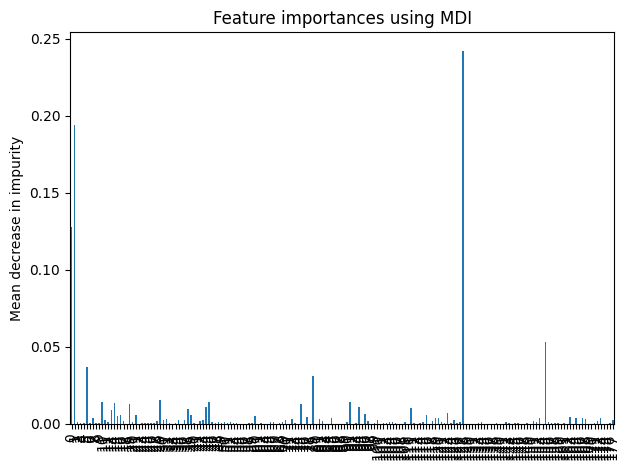

In [97]:
forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [204]:
train_process_data = pd.read_pickle('data/processed/train.pkl')

In [205]:
train_process_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1370 non-null   int32   
 1   MSZoning       1370 non-null   category
 2   LotFrontage    1370 non-null   float32 
 3   Street         1370 non-null   int8    
 4   LotShape       1370 non-null   category
 5   LandContour    1370 non-null   category
 6   Utilities      1370 non-null   category
 7   LotConfig      1370 non-null   category
 8   LandSlope      1370 non-null   category
 9   Neighborhood   1370 non-null   category
 10  Condition1     1370 non-null   category
 11  Condition2     1370 non-null   category
 12  BldgType       1370 non-null   category
 13  HouseStyle     1370 non-null   category
 14  OverallQual    1370 non-null   int32   
 15  OverallCond    1370 non-null   int32   
 16  YearBuilt      1370 non-null   int32   
 17  YearRemodAdd   1370 non-null   in

In [206]:
train_process_data

,MSSubClass,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,noise_level
0,60,RL,65.0,1,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,3,3,Y,0,61,2,2008,WD,Normal,3
1,20,RL,80.0,1,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,3,3,Y,298,0,5,2007,WD,Normal,4
2,60,RL,68.0,1,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,3,3,Y,0,42,9,2008,WD,Normal,3
3,70,RL,60.0,1,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,3,3,Y,0,35,2,2006,WD,Abnorml,3
4,60,RL,84.0,1,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,3,3,Y,192,84,12,2008,WD,Normal,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,1,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,3,3,Y,0,40,8,2007,WD,Normal,3
1456,20,RL,85.0,1,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,3,3,Y,349,0,2,2010,WD,Normal,3
1457,70,RL,66.0,1,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,3,3,Y,0,60,5,2010,WD,Normal,3
1458,20,RL,68.0,1,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,3,3,Y,366,0,4,2010,WD,Normal,3
